In [ ]:
## Exercise 3

from scipy import misc
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125

def plotfft(fft):
    plt.imshow(np.log(np.fft.fftshift(fft)), interpolation="none",cmap="plasma")
def pltphas(fft):
    plt.imshow(np.fft.fftshift(fft), interpolation="none",cmap="plasma")

def pltimg(i):
    plt.imshow(i,interpolation="none",cmap="gray")

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

i = np.asarray(misc.imread('../../lenna.png'))
i= rgb2gray(i)
I = np.fft.fft2(i)
absI = np.abs(I)
angI = np.angle(I)
pltimg(i)
plt.figure()
plotfft(absI)
plt.title("magnitude")
plt.savefig("tp3_e3_plt1.png",bbox_inches='tight')

plt.figure()
plt.title("phase")
pltphas(angI)
plt.savefig("tp3_e3_plt2.png",bbox_inches='tight')

# Inverse FFT
i_rec = np.fft.ifft2(I)
i_abs = np.fft.ifft2(absI)
i_ang = np.fft.ifft2(angI)
plt.figure()
pltimg(np.abs(i_rec))
plt.title("reconstrated")
plt.figure()
plt.title("reconstructed using magnitude")
plt.imshow(np.log(np.abs(i_abs)),cmap="plasma")
plt.savefig("tp3_e3_plt3.png",bbox_inches='tight')

# plotfft(np.abs(i_abs))
plt.figure()
# plotfft(np.abs(i_ang))
plt.title("reconstructed using phase")
plt.imshow(np.log(np.abs(i_ang)),cmap="plasma")
plt.savefig("tp3_e3_plt4.png",bbox_inches='tight')

plt.show()

time: 0.06615853309631348s
(768, 768)
(768, 768)
time: 0.14960455894470215s
(769, 769)
time: 0.06926274299621582s
time: 0.1599712371826172s
(513, 513)


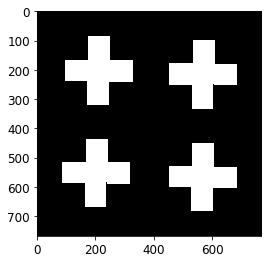

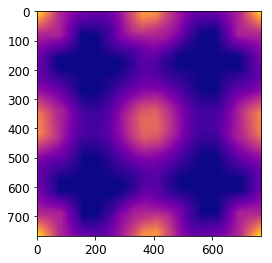

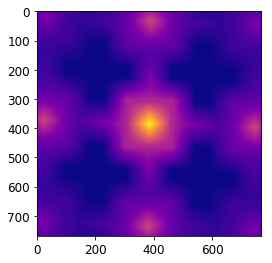

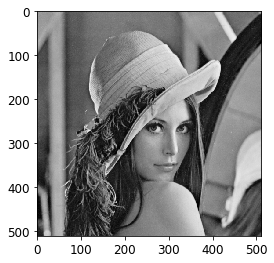

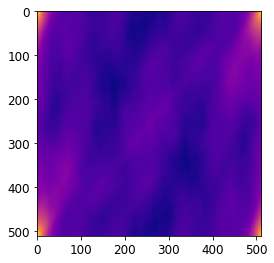

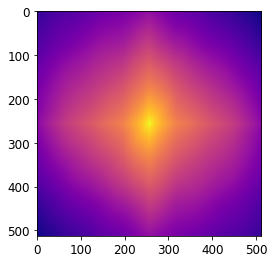

In [18]:
## Exercise 4

from scipy import misc,signal
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def xcorr2(x,y):
    nx = x.shape[0]
    ny = y.shape[1]
    r = scipy.signal.fftconvolve(x,np.conj(np.rot90(y,2)))
    nx = int((r.shape[0]-nx)/2)
    ny = int((r.shape[1]-ny)/2)
    return r[nx:-nx,ny:-ny]
def corr(x,y):
    X = np.fft.fft(x)
    Y = np.fft.fft(y)
    C = np.conj(X)*(Y)
    return np.fft.ifft(C)

def corr2(x,y):
    X = np.fft.fft2(x)
    Y = np.fft.fft2(y)
    C = np.conj(X)*Y
    return np.fft.ifft2(C)


i = np.asarray(misc.imread('TP3_images/cross.png'))
i= rgb2gray(i)
t = time.time()
ai= corr2(i,i)
t = time.time()-t
print(f"time: {t}s")

print(i.shape)
print(np.rot90(np.conj(i),2).shape)

t = time.time()
xi = xcorr2(i,i)
t = time.time()-t
print(f"time: {t}s")

plt.imshow(i,cmap='gray')
plt.figure()
plt.imshow(ai.real,cmap='plasma')
plt.savefig("tp3_e4_plt1.png",bbox_inches='tight')
plt.figure()
print(xi.shape)
plt.imshow(xi.real,cmap='plasma')
plt.savefig("tp3_e4_plt2.png",bbox_inches='tight')

i = np.asarray(misc.imread('../../lenna.png'))
i= rgb2gray(i)
t = time.time()
ai= corr2(i,i)
t = time.time()-t
print(f"time: {t}s")


t = time.time()
xi = xcorr2(i,i)
t = time.time()-t
print(f"time: {t}s")
plt.figure()
plt.imshow(i,cmap='gray')
plt.figure()
plt.imshow(ai.real,cmap='plasma')
plt.savefig("tp3_e4_plt3.png",bbox_inches='tight')
plt.figure()
print(xi.shape)
plt.imshow(xi.real,cmap='plasma')
plt.savefig("tp3_e4_plt4.png",bbox_inches='tight')
plt.show()


plt.show()


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:90: RuntimeWarning: divide by zero encountered in log


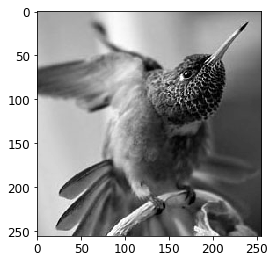

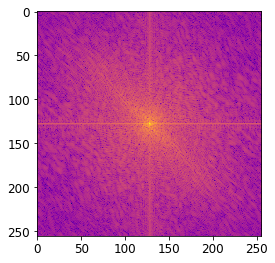

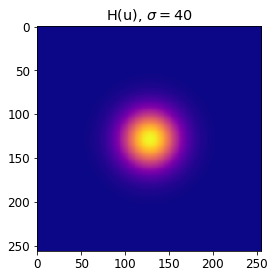

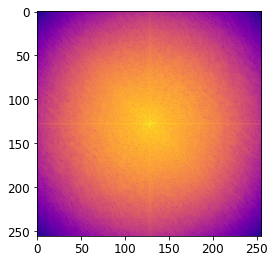

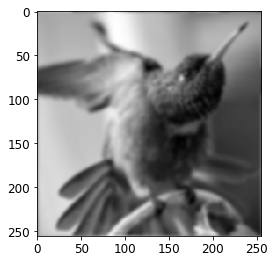

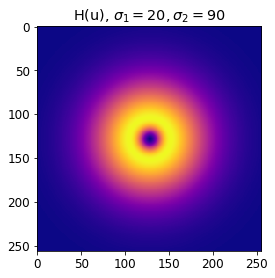

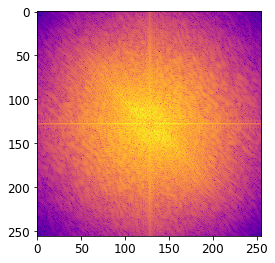

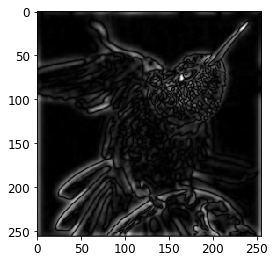

In [117]:
## Exercise 5

from scipy import misc,signal
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def _hipass(u,A,B,s1,s2):
    return _fftgauss(u,A,s1)-_fftgauss(u,B,s2)

def _fftgauss(u,A,sigma):
    return np.power(A,-(u**2/(2*sigma**2)))+1j*np.power(A,-(u**2/(2*sigma**2)))

fftgauss = np.vectorize(_fftgauss)
hipass = np.vectorize(_hipass)

i = np.asarray(misc.imread('TP3_images/bird.png'))
i = rgb2gray(i)


plt.imshow(i,cmap="gray")
plt.savefig("tp3_e5_plt1.png",bbox_inches='tight')

I = np.fft.fft2(i)
plt.figure() 
plt.imshow(np.log(np.abs(np.fft.fftshift(I))),cmap="plasma")
plt.savefig("tp3_e5_plt2.png",bbox_inches='tight')

nx = I.shape[0]
ny = I.shape[1]
xy = np.zeros(I.shape)
x = np.arange(-nx/2,nx/2)
y = np.arange(-ny/2,ny/2)
for i in range(0,nx):
    for j in range(0,ny):
        xy[i,j]=np.sqrt(x[i]**2+y[j]**2)
sigma = 40
H= fftgauss(xy,25,sigma)

plt.figure()
plt.imshow(np.abs(H),cmap="plasma")
plt.title(f"H(u), $\sigma={sigma}$")
plt.savefig("tp3_e5_plt3.png",bbox_inches='tight')



H = np.fft.ifftshift(H)

If = I*H
# print(If)
plt.figure() 
# plt.imshow(np.abs(H))
plt.imshow(np.log(np.abs(np.fft.fftshift(If))),cmap="plasma")
plt.savefig("tp3_e5_plt5.png",bbox_inches='tight')
iF = np.fft.ifft2(If)
plt.figure()
plt.imshow(np.abs(iF),cmap="gray")
plt.savefig("tp3_e5_plt6.png",bbox_inches="tight")

s1 = 20
s2 = 90
H= hipass(xy,80,80,s1,s2)

plt.figure()
plt.imshow(np.abs(H),cmap="plasma")
plt.title(f"H(u), $\sigma_1={s1},\sigma_2={s2}$")
plt.savefig("tp3_e5_plt7.png",bbox_inches='tight')

H = np.fft.fftshift(H)

If = I*H
# print(If)
plt.figure() 
# plt.imshow(np.abs(H))
plt.imshow(np.log(np.abs(np.fft.fftshift(If))),cmap="plasma")
plt.savefig("tp3_e5_plt8.png",bbox_inches='tight')
iF = np.fft.ifft2(If)
plt.figure()
plt.imshow(np.abs(iF),cmap="gray")
plt.savefig("tp3_e5_plt9.png",bbox_inches="tight")

plt.show()

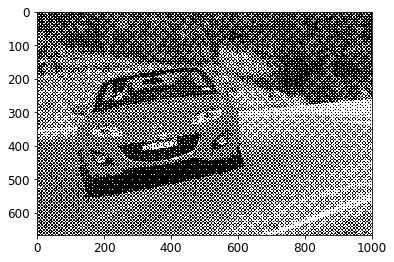

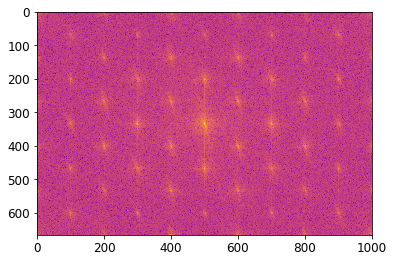

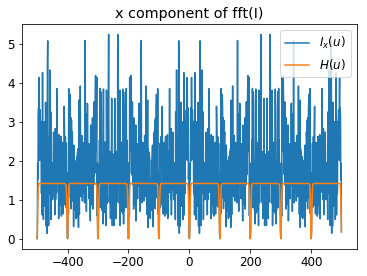

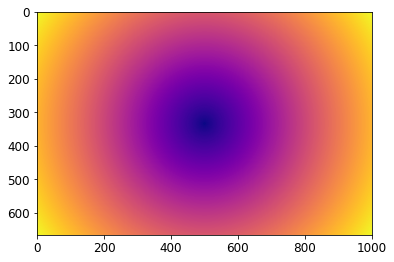

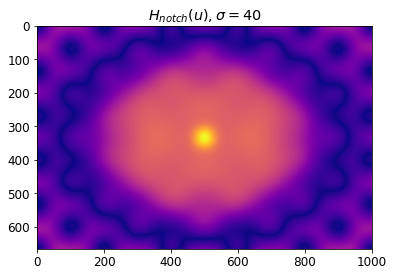

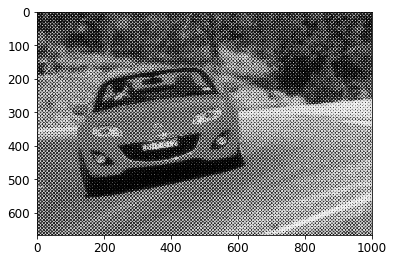

In [66]:
## Exercise 5

from scipy import misc,signal
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def _hipass(u,A,B,s1,s2):
    return _fftgauss(u,A,s1)-_fftgauss(u,B,s2)

def _fftgauss(u,A,sigma):
    return A**(-(u**2/(2*sigma**2)))+1j*A**(-(u**2/(2*sigma**2)))

def coords(shape,cx=0,cy=0):
    m, n = shape[:2]
    x = np.arange(m)[:,None]
    y = np.arange(n)
    mid_x, mid_y = (scipy.array(shape[:2]) - 1) / float(2)
    return ((y - mid_y-cx) ** 2 + (x - mid_x-cy) ** 2) ** 0.5

lowpass = np.vectorize(_fftgauss)
hipass = np.vectorize(_hipass)
i = np.asarray(misc.imread('TP3_images/csi_1.png'))
# i = rgb2gray(i)


plt.imshow(i,cmap="gray")
plt.savefig("tp3_e6_plt1.png",bbox_inches='tight')


I = np.fft.fft2(i)
plt.figure() 
plt.imshow(np.log(np.abs(np.fft.fftshift(I))),cmap="plasma")
plt.savefig("tp3_e6_plt2.png",bbox_inches='tight')
Ix = np.sum(I,axis=0)/I.size
Iy = np.sum(I,axis=1)/I.size


fx =np.fft.fftshift(np.fft.fftfreq(Ix.size,d=1/Ix.size))
fy =np.fft.fftshift( np.fft.fftfreq(Iy.size,d=1/Ix.size))

H = lowpass(fx,100,4)
for f in [1,2,3,4,5]:
    H += lowpass(fx+f*100,100,4)
    H += lowpass(fx-f*100,100,4)

H = ((1+1j)-H)

plt.figure()
plt.plot(fx,np.abs(np.fft.fftshift(Ix)),label="$I_x(u)$")
plt.plot(fy,np.abs(np.fft.fftshift(Iy)),label="$I_y(u)$")
# plt.plot(fx,np.abs(H),label="$H(u)$")
plt.title("x and y component of fft(I)")
plt.legend()
plt.savefig("tp3_e6_plt3.png",bbox_inches='tight')
plt.figure()
xy = coords(I.shape,0,0)
plt.imshow(xy,cmap="plasma")
plt.figure()
A = 100
s = 50
H = np.zeros(I.shape)+0j
sx = 100
sy = 100*I.shape[0]/I.shape[1]

for x in [0,2,4]:
    for y in [0,2,4]:
        alpha = np.sqrt(x**2+y**2)/10+0.1
        if x==0 and y==0:
            xy = coords(I.shape,x,y)
            H += lowpass(xy,A,s)
        elif x==0:
            xy = coords(I.shape,x,y*sy)*alpha
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,x,-y*sy)*alpha
            H+= lowpass(xy,A,s)
        elif y==0:
            xy = coords(I.shape,x*sx,y)*alpha
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,-x*sx,y)*alpha
            H+= lowpass(xy,A,s)
        else:
            xy = coords(I.shape,(x)*sx,(y)*sy)*alpha
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,-(x)*sx,(y)*sy)*alpha
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,(x)*sx,-(y)*sy)*alpha
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,-(x)*sx,-(y)*sy)*alpha
            H+= lowpass(xy,A,s)
            
for x in [1,3,5]:
    for y in [1,3,5]:
        alpha = np.sqrt(x**2+y**2)/10+0.1
        xy = coords(I.shape,(x)*sx,(y)*sy)*alpha
        H+= lowpass(xy,A,s)
        xy = coords(I.shape,-(x)*sx,(y)*sy)*alpha
        H+= lowpass(xy,A,s)
        xy = coords(I.shape,(x)*sx,-(y)*sy)*alpha
        H+= lowpass(xy,A,s)
        xy = coords(I.shape,-(x)*sx,-(y)*sy)*alpha
        H+= lowpass(xy,A,s)
        
H = (1+1j)-H
plt.title("$H_{notch}(u), \sigma=40$")
# plt.imshow(np.log(np.abs(np.fft.fftshift(I))),cmap="plasma")
plt.imshow(np.abs(H),cmap="plasma")
plt.savefig("tp3_e6_plt4.png",bbox_inches='tight')

H = np.fft.ifftshift(H)
Ih= I*H
ih= np.fft.ifft2(Ih)
plt.figure()
plt.imshow(np.abs(ih),cmap="gray")
plt.savefig("tp3_e6_plt5.png",bbox_inches='tight')
plt.show()

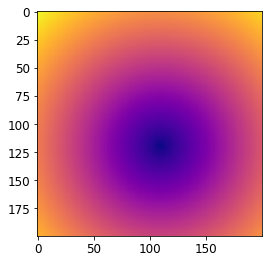

In [27]:
## Exercise 5

from scipy import misc,signal
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

def coords(shape,cx=0,cy=0):
    m, n = shape[:2]
    x = np.arange(m)[:,None]
    y = np.arange(n)
    mid_x, mid_y = (scipy.array(shape[:2]) - 1) / float(2)
    return ((y - mid_y-cx) ** 2 + (x - mid_x-cy) ** 2) ** 0.5

mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125
cx=0
cy=0
shape = np.array([200,200])


xy = coords(shape,10,20)


plt.imshow(xy,cmap="plasma")
plt.show()

In [107]:
A = 100
s = 50
H = np.zeros(I.shape)+0j
sx = 100
sy = 100*I.shape[0]/I.shape[1]

for x in [0,2,4]:
    for y in [0,2,4]:
        if x==0 and y==0:
            continue
        elif x==0:
            xy = coords(I.shape,x,y*sy)
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,x,-y*sy)
            H+= lowpass(xy,A,s)
        elif y==0:
            xy = coords(I.shape,x*sx,y)
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,-x*sx,y)
            H+= lowpass(xy,A,s)
        else:
            xy = coords(I.shape,(x)*sx,(y)*sy)
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,-(x)*sx,(y)*sy)
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,(x)*sx,-(y)*sy)
            H+= lowpass(xy,A,s)
            xy = coords(I.shape,-(x)*sx,-(y)*sy)
            H+= lowpass(xy,A,s)
            
for x in [1,3,5]:
    for y in [1,3,5]:
        xy = coords(I.shape,(x)*sx,(y)*sy)
        H+= lowpass(xy,A,s)
        xy = coords(I.shape,-(x)*sx,(y)*sy)
        H+= lowpass(xy,A,s)
        xy = coords(I.shape,(x)*sx,-(y)*sy)
        H+= lowpass(xy,A,s)
        xy = coords(I.shape,-(x)*sx,-(y)*sy)
        H+= lowpass(xy,A,s)
H = (1+1j)-H


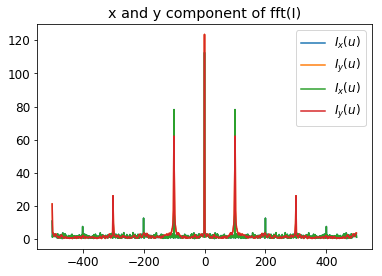

In [90]:
plt.plot(fx,np.abs(np.fft.fftshift(Ix)),label="$I_x(u)$")
plt.plot(fy,np.abs(np.fft.fftshift(Iy)),label="$I_y(u)$")
# plt.plot(fx,np.abs(H),label="$H(u)$")
plt.title("x and y component of fft(I)")
plt.legend()
plt.savefig("tp3_e6_plt3.png",bbox_inches='tight')
plt.show()

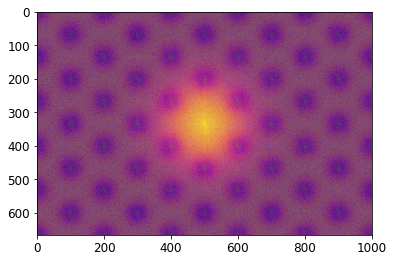

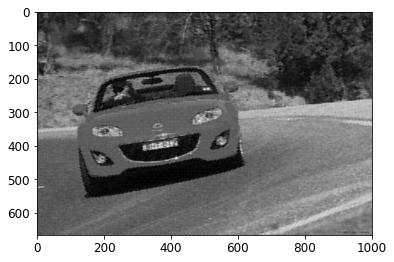

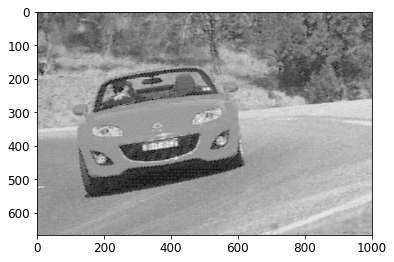

In [108]:

Hlp = lowpass(coords(I.shape),255,200)
Is = np.fft.fftshift(I)
plt.imshow(np.log(np.abs(Is)),cmap='plasma')
plt.imshow(np.abs(Hlp),alpha=0.5,cmap='plasma')
plt.imshow(np.abs(H),alpha=0.2,cmap="plasma")
plt.savefig("tp3_e6_filters.png",bbox_inches='tight')

Ih = I*np.fft.ifftshift(Hlp)*np.fft.ifftshift(H)
ih = np.fft.ifft2(Ih)
plt.figure()
plt.imshow(np.abs(ih),cmap="gray")
plt.savefig("tp3_e6_plt6.png",bbox_inches='tight')

plt.figure()
plt.imshow(np.sqrt(np.abs(ih)),cmap="gray")
plt.savefig("tp3_e6_plt6.png",bbox_inches='tight')

plt.show()